<a href="https://colab.research.google.com/github/Aashutosh-Basnet/Machine-Learning-Algorithms/blob/main/SVM/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


X = df.drop('target', axis=1)
y = df['target']

In [15]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
svr_rbf = SVR(kernel='rbf', C=10, epsilon=.1)
svr_rbf.fit(X_train, y_train)

SVR(C=10)

In [19]:
y_pred = svr_rbf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 0.2405
R^2 Score: 0.7556


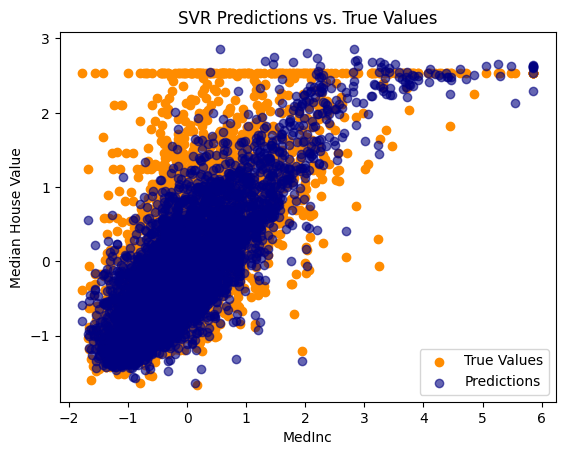

In [20]:
feature_idx = 0  # Choose a feature index (0 = Median Income in original dataset)
X_feature = X_test[:, feature_idx].reshape(-1, 1)
y_feature_pred = svr_rbf.predict(X_test)

plt.scatter(X_feature, y_test, color='darkorange', label='True Values')
plt.scatter(X_feature, y_feature_pred, color='navy', alpha=0.6, label='Predictions')
plt.title("SVR Predictions vs. True Values")
plt.xlabel(data.feature_names[feature_idx])
plt.ylabel("Median House Value")
plt.legend()
plt.show()